# Simple linear regression

In [1]:
# import packages
import pandas as pd
import seaborn as sns

In [2]:
# import data
penguins = pd.read_csv('penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


## Data cleaning (not shown in videos)

In [6]:
# Drop Adelie and Gentoo penguins, drop missing values
penguins_sub = penguins[penguins["species"] == "Chinstrap"]
chinstrap_penguins = penguins_sub.dropna()
chinstrap_penguins.reset_index(inplace=True, drop=True)

In [7]:
# View the new dataset
chinstrap_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Chinstrap,Dream,46.5,17.9,192.0,3500.0,female
1,Chinstrap,Dream,50.0,19.5,196.0,3900.0,male
2,Chinstrap,Dream,51.3,19.2,193.0,3650.0,male
3,Chinstrap,Dream,45.4,18.7,188.0,3525.0,female
4,Chinstrap,Dream,52.7,19.8,197.0,3725.0,male


### How to check the validity of the assumptions

Many of the linear regression assumptions can be checked through data visualizations. Some assumptions can be checked before the model is built, and others can only be checked after the model is constructed, and predicted values are calculated.

#### Linearity
In order to assess whether or not there is a linear relationship between the independent and dependent varibles, it is easiest to create a scatterplot of the dataset. The independent variable would be on the x-axis, and the dependent variable would be on the y-axis.
There are a number of different Python functions that you can use to read in the data and create a scatterplot. Some packages used for data visualizations include Matplotlib, seaborn, and Plotly.
Testing for linearity should occur before the model is built.

C:\Users\JohnPeter Mwangi MKH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


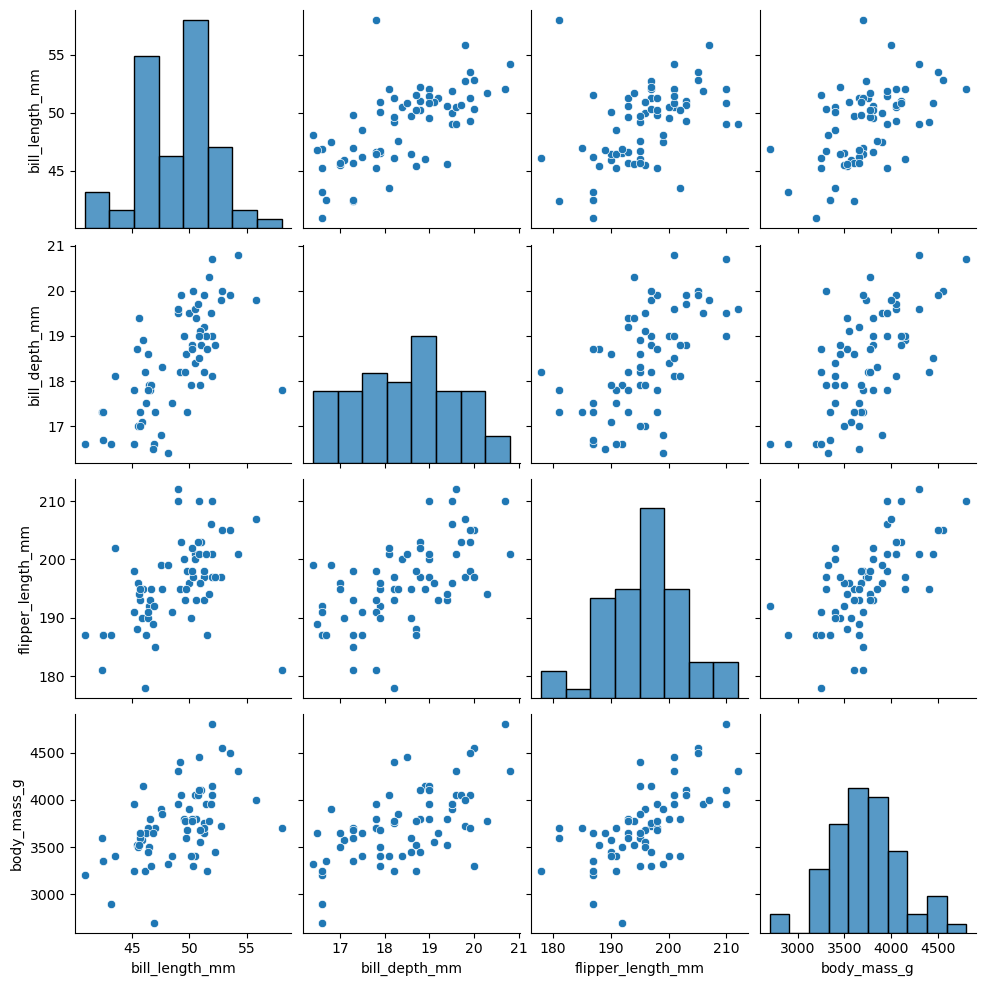

In [8]:
# Create pairwise scatterplots of Chinstrap penguins data 
sns.pairplot(chinstrap_penguins)

#### Normality
The normality assumption focuses on errors, which can be estimated by the residuals, or the difference between the observed values in the data and the values predicted by the regression model.
For that reason, the normality assumption can only be confirmed after a model is built, and predicted values are calculated. Once the model has been built, you can either create a QQ-plot to check that the residuals are normally distributed, or create a histogram of the residuals. Whether the assumption is met is a matter of some interpretition.

#### Quantile-quantile plot
A Q-Q plots is a graphical tool used to compare two probability distributions by plotting their quantiles against each other. Data professionals prefer Q-Q plots to histograms to guage the normality of a distribution because it's easier to discern whether a plot adheres to a straight line than it is to determine how closely a histogram follows a normal curve.
Here's how Q-Q plots work when assessing the normality of a model's residuals:
1. Rank-order the residuals. Sort your n residuals from the least to the greatest. For each one, calculate what percentage of the data falls at or below this rank. These are the n quantiles of your data.
2. Compare to a normal distribution. Divide a standard normal distribution into n+1 equals areas (i.e slice it n times). If the residuals are normally distributed, the quantile of each residual (i.e, what percentage of the data falls below each ranked residual) will align closely with the corresponding z-scores of each of the n cuts on the standard normal distribution (these can be found in a normal z-score table or, more commonly, using statistical software).
3. Construct a plot. A Q-Q plot has a standard normal distribution along its x-axis and the rank ordered residual values on its y-axis. If the residuals are normally distributed, the quantile values of the residuals will correspond with those of the standardized normal distribution, and both will increase linearly. If you first standardize your residuals (convert to z-scores by subtracting the mean and dividing by the standard deviation), the two axes will be on identical scales, and, if the residuals are indeed normally distributed, the line will be at a 45 degree angle. However, standardizing the residuals is not a requirement of a Q-Q plot. In either case, the residuals are not normally distributed.

#### How to plot a Q-Q plot
You don't have to manually perform the steps outlined above. There are computing libraries to handle that. One way to do this is to use statsmodels library. If you import statsmodels.api, you can use the ggplot() function directly. Shown below.

In [11]:
# import statsmodels.api
import statsmodels.api as sm
import matplotlib.pyplot as plt

# you can use the ggplot function directly. 
# The example below uses the residuals from a statsmodels ols model object.
# The model regresses penguins' flipper length on their bill depth(Y on X).

residuals = model.resid
fig = sm.qqplot(residuals, line = 's')
plt.show()

And here is a histogram of the same data

In [ ]:
fig = sns.histplot(residuals)
fig.set_xlabel('Residual Value')
fig.set_title('Histogram of Residuals')
plt.show()

#### Independent Observations
Whether or not observations are independent is dependent on understanding your data. Asking questions like:
- How was the data collected?
- What does each data point represent?
- Based on the data collection process, is it likely that the value of one data point impacts the value of another data point?
An objective review of these questions, which would include soliciting insight from others who might notice things you don't, can help you determine whether or not the independent observations assumption is violated. This in turn aill allow you to determine your next steps working with the dataset at hand.

#### Homoscedasticity
Like the normality assumption, the homoscedasticity assumption concerns the residuals of a model, so it can only be evaluated after a model has already been constructed. A scatterplot of the fitted values (i.e the model's predicted Y values) versus the residuals can help determine whether the homoscedasticity assumption is violated.

In [12]:
import matplotlib.pyplot as plt

fig = sns.scatterplot(fitted_values, residuals)
fig.axhline(0)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
plt.show()